This code is to get data from biznesradar.pl and analyze stocks.

In [517]:
# download libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly as py
py.offline.init_notebook_mode(connected=True)

from plotly.offline import iplot
import plotly as py

# import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
# cf.go_offline()

pd.options.display.max_columns = 100   # set the maximum columns to display
pd.options.display.max_rows = 100   # set the maximum rows to display

In [518]:
# list of stocks in biznesradar 
lista_spolek = pd.read_csv('biznesradar_stocks_parameters.csv', sep=',')
# display(lista_spolek.head(5))

# define the search string
search = 'syn'  # Replace 'syn' with your desired value, or 'all_stocks' to get all rows

# Check if search is 'all_stocks' or something else
if search == 'all_stocks':
    lista_spolek_import = lista_spolek  # Return all rows
else:
    lista_spolek_import = lista_spolek[lista_spolek['Stock Parameter'].str.contains(search, case=False, na=False)]

# display the filtered or full data
display(lista_spolek_import)


,Ticker,Stock Parameter
668,SNT (SYNEKTIK),SYNEKTIK


In [519]:
# spółka do analizy
if search == 'all_stocks':
    Spolka = 'SYNEKTIK' # podaj nazwę spółki
else:
    Spolka = lista_spolek_import['Stock Parameter'].values[0]

#Akcjonariat

In [520]:
table_Akcjonariat = pd.read_html('https://www.biznesradar.pl/akcjonariat/{}'.format(Spolka))
table_Akcjonariat = table_Akcjonariat[0]
display(table_Akcjonariat.head(5))
display(table_Akcjonariat.tail(5))

display(table_Akcjonariat.columns)


,Akcjonariusz,Udział,Liczba akcji,Wartość rynkowa,Udział na WZA,Liczba głosów,Data aktualizacji
0,Książek Holding Sp. z o.o.,26.13 %,2 229 056,504 881 184,26.13 %,2 229 056,09.10.2024
1,Cezary Kozanecki (pośrednio poprzez Melhus Com...,24.00 %,2 047 380,463 731 570,24.00 %,2 047 380,09.10.2024
2,razem,50.14 %,4 276 436,968 612 754,50.14 %,4 276 436,NaN


,Akcjonariusz,Udział,Liczba akcji,Wartość rynkowa,Udział na WZA,Liczba głosów,Data aktualizacji
0,Książek Holding Sp. z o.o.,26.13 %,2 229 056,504 881 184,26.13 %,2 229 056,09.10.2024
1,Cezary Kozanecki (pośrednio poprzez Melhus Com...,24.00 %,2 047 380,463 731 570,24.00 %,2 047 380,09.10.2024
2,razem,50.14 %,4 276 436,968 612 754,50.14 %,4 276 436,NaN


Index(['Akcjonariusz', 'Udział', 'Liczba akcji', 'Wartość rynkowa',
       'Udział na WZA', 'Liczba głosów', 'Data aktualizacji'],
      dtype='object')

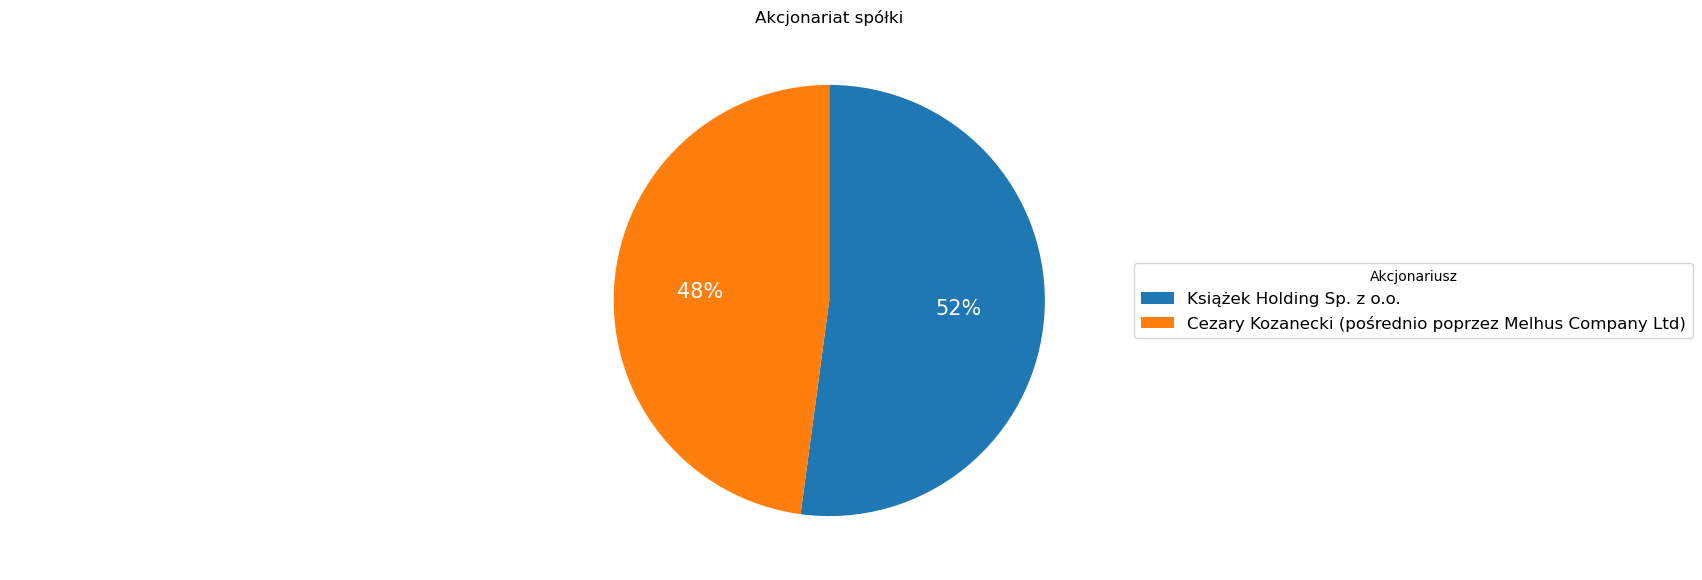

In [521]:
# Set index to 'Akcjonariusz'
table_Akcjonariat = table_Akcjonariat.set_index('Akcjonariusz')

# Drop row with 'razem'
table_Akcjonariat = table_Akcjonariat.drop(index='razem', errors='ignore')

# Extract numerical values from 'Udział' column and convert to float
table_Akcjonariat['Udział'] = table_Akcjonariat['Udział'].str.split(' ').str[0].astype(float)

# Create a series for plotting
series = pd.Series(table_Akcjonariat['Udział'] / 100, name='Udział [%]')

# Sort pie chart in descending order (highest to lowest)
series = series.sort_values(ascending=False)

# Plot pie chart (force clockwise direction)
fig, ax = plt.subplots(figsize=(9, 7))  # Adjust width to give space for the legend
wedges, texts, autotexts = ax.pie(
    series, 
    labels=series.index,  # Ensure correct labels
    autopct='%.0f%%', 
    textprops={'color': 'w', 'fontsize': 14}, 
    startangle=90,  # Start from top (12 o'clock)
    counterclock=False  # Force clockwise order
)

# Adjust the font size for the percentage text inside the pie chart
for autotext in autotexts:
    autotext.set_fontsize(15)  # Adjust the font size for the percentage text
    
# Move the legend to the right of the pie chart
ax.legend(
    wedges,  # Keep colors consistent
    series.index,  
    title="Akcjonariusz",
    fontsize=12,
    loc="center left",  # Align it to the center left of the plot area
    bbox_to_anchor=(1.05, 0.5)  # Position the legend to the right of the pie chart (adjust as needed)
)

plt.title('Akcjonariat spółki')
plt.show()


# Przetwarzanie tabel:

### Tabela RZIS

In [522]:
table_RZS = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/{}'.format(Spolka))

In [523]:
table_Bilans = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-bilans/{}'.format(Spolka))
display(table_Bilans).head()

[                                                   0
 0                  Aktywa razem: wzrost o 25.12% r/r
 1                 Aktywa trwałe: wzrost o 24.13% r/r
 2  Rzeczowe składniki majątku trwałego: wzrost o ...
 3               Aktywa obrotowe: wzrost o 25.89% r/r
 4    Należności krótkoterminowe: wzrost o 40.26% r/r
 5    Inwestycje krótkoterminowe: wzrost o 33.77% r/r
 6  Środki pieniężne i inne aktywa pieniężne: wzro...
 7  Kapitał własny akcjonariuszy jednostki dominuj...,
                              0
 0  Zapasy: spadek o 40.35% r/r,
                                            Unnamed: 0 2009  (gru 09)  \
 0                                     Data publikacji     2010-02-14   
 1                                       Aktywa trwałe            278   
 2                     Wartości niematerialne i prawne             61   
 3                                       Wartość firmy            NaN   
 4                 Rzeczowe składniki majątku trwałego            150   
 5        

AttributeError: 'NoneType' object has no attribute 'head'